# Fine-tuning InceptionV3 for food nutrition classifier

### Database parameters

In [1]:
# Set metadata database paths
database_path = 'data.sqlite'

# Set image database paths
image_data_database_path = 'image_data_299.sqlite'

# Index cache
condition_indeces = None

#Set the id of classification stored in the database which will be used to train model.
classification_id = 12

### Training parameters

In [2]:
# Limit number of images per class used for training and validating.
train_max = 1000000
val_max = 1000000
test_max = 1000

# Image dimensions (Inception input size)
img_width, img_height = 299, 299

# Set batch size to biggest that fits in your memory.
batch_size = 256

# Number of epochs to train top inception network blocks.
top_epochs = 50

# Number of epochs to fine tune the network.
fit_epochs = 50

### Name the run

In [3]:
# Name the current parameters set. This name will be used as a Tensorboard log directory subfolder.
# having separate subfolder for each run will allow you to conviniently view performance changes beween runs.

run_name = "cid%d_tm%d_vm%d_bs%d_te%d_te%d" % (classification_id, 
                                               train_max, val_max, 
                                               batch_size, top_epochs, 
                                               fit_epochs)

print ("Run name: %s" % run_name)

Run name: cid12_tm1000000_vm1000000_bs256_te50_te50


### Initializing 

In [4]:
# Import custom SQLite data reader
from tools.sqlite_data_loader import SQLiteDataLoader

sdl = SQLiteDataLoader(database_path, image_data_database_path)

# Load the number of nutrition classes
class_count = len(sdl.get_classes(classification_id))

print ("Number of nutrition classes: %d" % class_count)

Number of nutrition classes: 25


## Visualize recipe classification

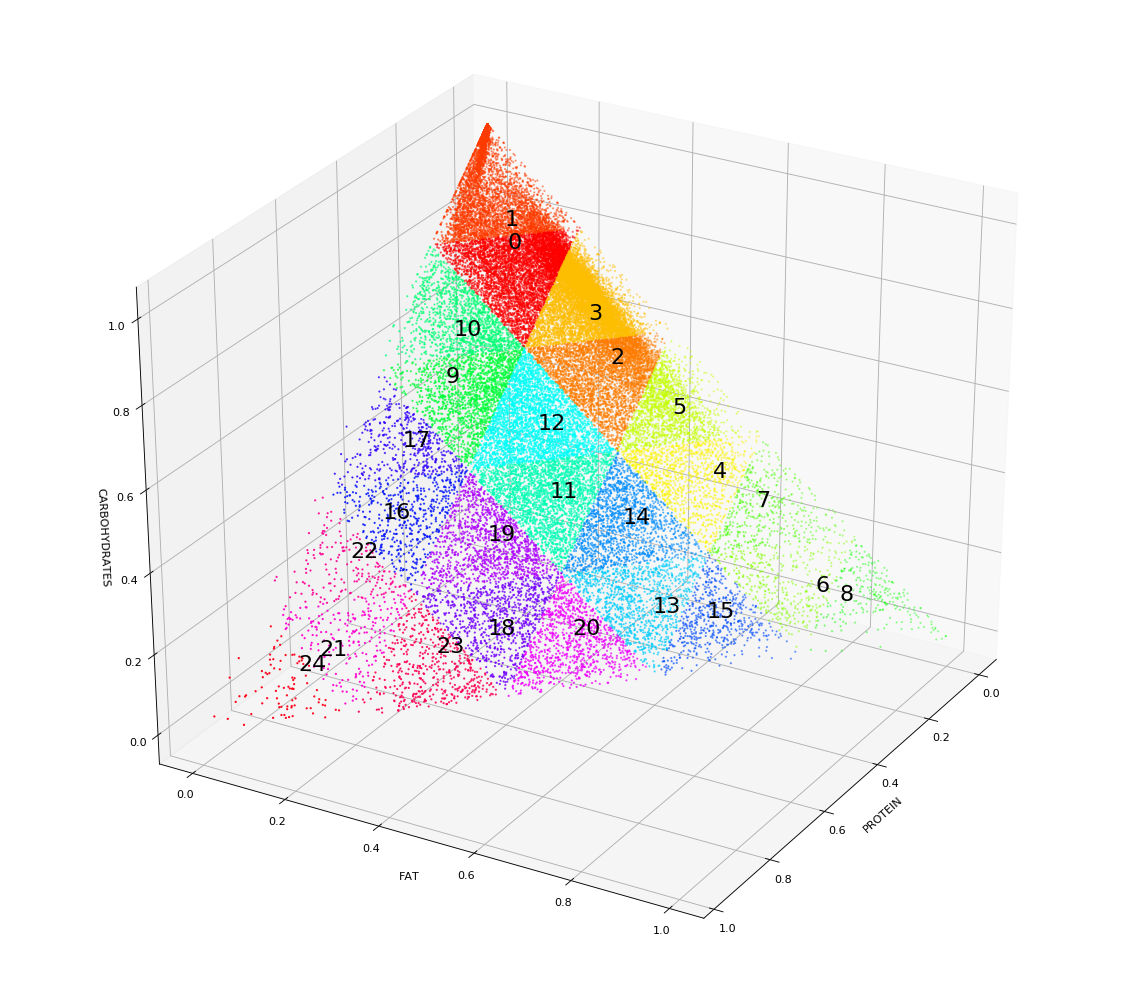

In [5]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = plt.axes(projection='3d')

ax.view_init(30, 30)

rates = np.array(sdl.get_nutrition_values(classification_id))

# Data for three-dimensional scattered points
rates_x = rates[:,0]
rates_y = rates[:,1]
rates_z = rates[:,2]

rates_c = rates[:,3]
rates_c /= class_count

ax.scatter3D(rates_x, rates_y, rates_z, c=rates_c, cmap='hsv', s=1);

ax.set_xlabel('PROTEIN')
ax.set_ylabel('FAT')
ax.set_zlabel('CARBOHYDRATES')

centroids = np.array(sdl.get_centroids(classification_id)) 

for cd in centroids:
    ax.text(cd[0],cd[1],cd[2],  '%d' % cd[3], size=20, zorder=1, color='k') 

Using TensorFlow backend.


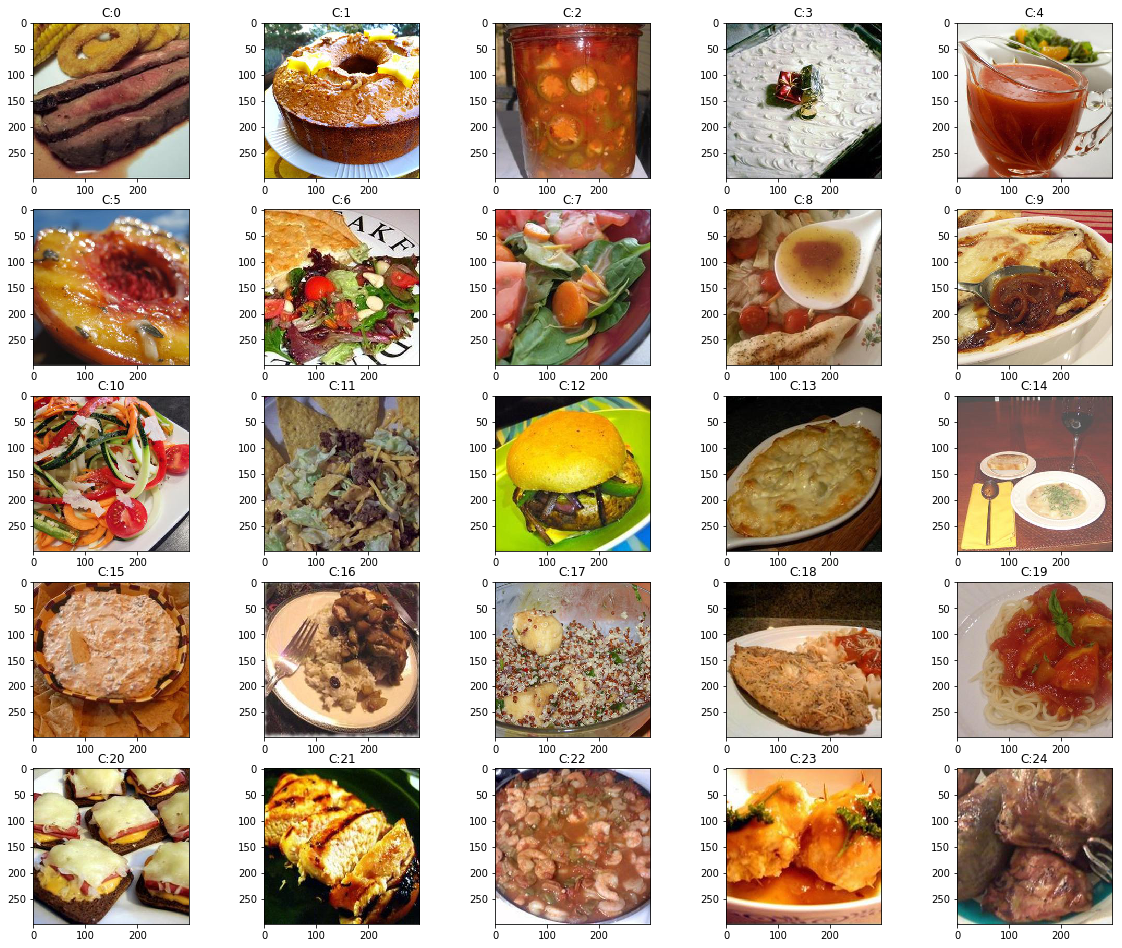

In [6]:
"""
Show an image for each nutrition class. 
"""

from image_ex import load_img_bytes
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
columns = 5

for ci in range(class_count):
    image_id = sdl.get_image_ids_by_class(ci, classification_id, 0, 1)[0]
    image_data = sdl.get_image_data_by_id(image_id)
    pil_img = load_img_bytes(image_data)
    
    sp = fig.add_subplot(class_count / columns + 1, columns, ci + 1)
    sp.set_title('C:%d'%ci)
    plt.imshow(pil_img)
    